# Getting Started

---

# Import OpenCV-Python and other packages

In [1]:
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt

print("OpenCV-Python Version %s" % cv2.__version__)

OpenCV-Python Version 4.8.1


# Open/display an image

In [2]:
img = cv2.imread('imgs/old-joe-campus-aerial.jpeg', cv2.IMREAD_COLOR)

# If the image path is wrong, the resulting img will be none
if img is None:
    print('Open Error')
else:
    print('Image Loaded')

# cv2.imwrite('campus.jpg', img)

Image Loaded


In [3]:
# Check the resulting img
print(type(img))
print(img.shape)
print(img.dtype)
img[:2, :2, :]  # Right-upper-most few pixels of the image

<class 'numpy.ndarray'>
(600, 900, 3)
uint8


array([[[46, 77, 70],
        [55, 81, 75]],

       [[45, 66, 63],
        [49, 68, 65]]], dtype=uint8)

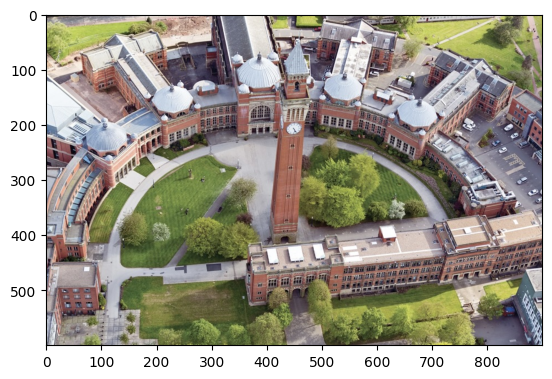

In [4]:
# display an image using matplotlib
# plt.imshow(img) # => The color of this line is wrong
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [5]:
cv2.imshow('image',img)
# cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

2023-11-26 19:10:13.489 Python[79248:3500715] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


-1

# Image Blurring (Image Smoothing)
Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. It actually removes high frequency content (eg: noise, edges) from the image. So edges are blurred a little bit in this operation (there are also blurring techniques which don't blur the edges). OpenCV provides four main types of blurring techniques:
- Averaging
- Gaussian Blurring
- Median Blurring
- Bilateral Filtering

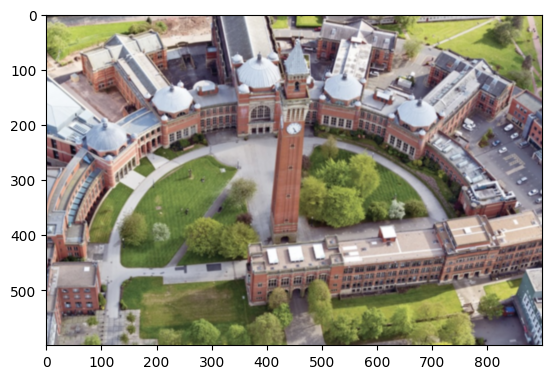

In [6]:
img_average = cv2.blur(img,(5,5))
plt.imshow(cv2.cvtColor(img_average, cv2.COLOR_BGR2RGB))

In [ ]:
img_bilateral = cv2.bilateralFilter(img,9,75,75)
plt.imshow(cv2.cvtColor(img_bilateral, cv2.COLOR_BGR2RGB))

In [ ]:
img_Gaussian = cv2.GaussianBlur(img,(5,5),0)
plt.imshow(cv2.cvtColor(img_Gaussian, cv2.COLOR_BGR2RGB))

In [ ]:
img_median = cv2.medianBlur(img,5)
plt.imshow(cv2.cvtColor(img_median, cv2.COLOR_BGR2RGB))

# Edge Detection

In this tutorial, we will find edges using Sobel operator(`cv2.Sobel()`) and Canny edge detector(`cv2.Canny()`).  

---

In [7]:
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt

dtype: uint8
shape: (400, 600)


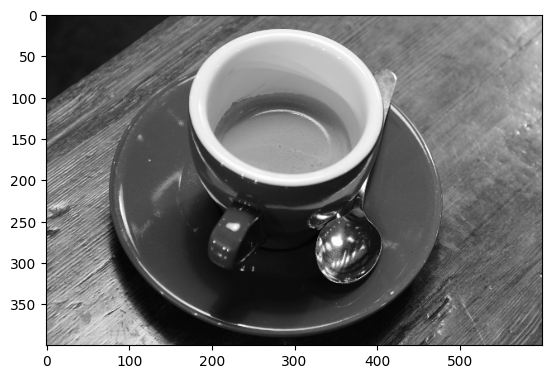

In [8]:
# Load an image into grayscale
input_image = cv2.imread('imgs/coffee.png', cv2.IMREAD_GRAYSCALE)  # input_image: 2-dim array
print('dtype: ' + str(input_image.dtype))
print('shape: ' + str(input_image.shape))

plt.imshow(input_image, cmap='gray')  # Make sure that the plot is drawn in grayscale

## 1. Edge detection with sobel operator

`dst = cv2.Sobel(src, ddepth, dx, dy, ksize=3, scale=1.0)`

- `src`: input image
- `ddepth`: output image depth
- `dx`: order of the derivative x
- `dy`: order of the derivative y
- `ksize`: size of the extended Sobel kernel; it must be 1, 3, 5, or 7
- `scale`: optional scale factor for the computed derivative values

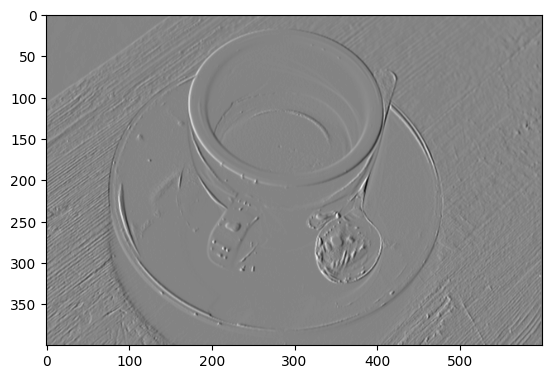

In [9]:
ddepth = cv2.CV_64F  # 64-bit float output
dx = 1  # First-order derivative in x-direction
dy = 0  # NO derivative in y-direction
sobelx = cv2.Sobel(input_image, ddepth, dx, dy)

plt.imshow(sobelx, cmap='gray')

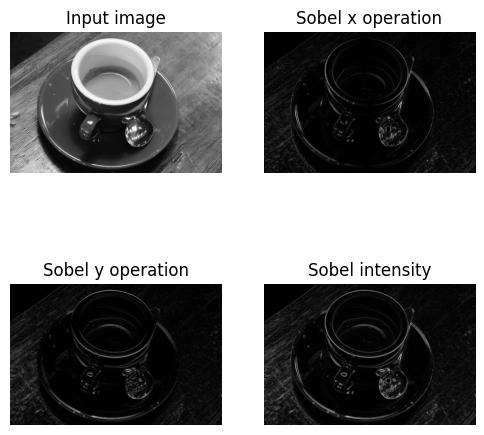

In [10]:
# sobel operations and its magnitudes
sobelx = cv2.Sobel(input_image, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(input_image, cv2.CV_64F, 0, 1)
sobel = cv2.sqrt(cv2.addWeighted(cv2.pow(sobelx, 2.0), 1.0, cv2.pow(sobely, 2.0), 1.0, 0.0))

plt.figure(figsize=(6, 6));
plt.subplot(2, 2, 1); plt.title('Input image'); plt.axis('off');
plt.imshow(input_image, cmap='gray');
plt.subplot(2, 2, 2); plt.title('Sobel x operation'); plt.axis('off');
plt.imshow(cv2.absdiff(sobelx, 0.0), cmap='gray')
plt.subplot(2, 2, 3); plt.title('Sobel y operation'); plt.axis('off');
plt.imshow(cv2.absdiff(sobely, 0.0), cmap='gray');
plt.subplot(2, 2, 4); plt.title('Sobel intensity'); plt.axis('off');
plt.imshow(sobel, cmap='gray');

---

## 2. Canny Edge Detection

`edges = cv2.Canny(image, threshold1, threshold2, apatureSize=3, L2gradient=False)`

- `image`: 8-bit grayscale input image
- `threshold1`/`threshold2`: thresholds for the hysteresis procedure
- `apertureSize`: aperture size for the `Sobel()` operator
- `L2gradient`: A flag. `True` to use $L_2$-norm of gradients. $L_1$-norm for `False`

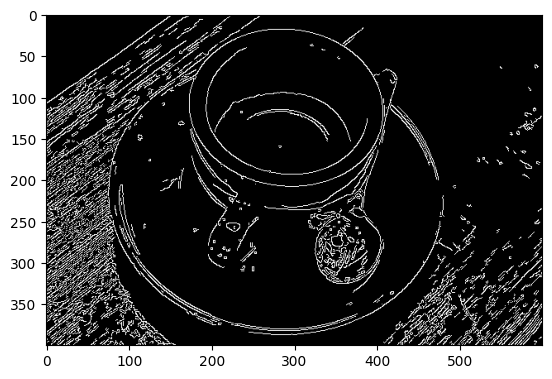

In [11]:
# Canny edge detection
threshold1 = 100
threshold2 = 200
canny = cv2.Canny(input_image, threshold1, threshold2)

plt.imshow(canny, cmap='gray')

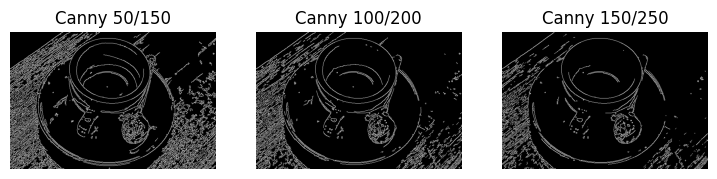

In [12]:
# Edge detections with the various thresholds
canny1 = cv2.Canny(input_image, 50, 150)
canny2 = cv2.Canny(input_image, 100, 200)
canny3 = cv2.Canny(input_image, 150, 250)

plt.figure(figsize=(9, 3));
plt.subplot(1, 3, 1); plt.title('Canny 50/150'); plt.axis('off');
plt.imshow(canny1, cmap='gray');
plt.subplot(1, 3, 2); plt.title('Canny 100/200'); plt.axis('off');
plt.imshow(canny2, cmap='gray');
plt.subplot(1, 3, 3); plt.title('Canny 150/250'); plt.axis('off');
plt.imshow(canny3, cmap='gray');

---
# Homography

In this notebook, we will learn geometric transformation of images in OpenCV-Python and how to get a homography of two images using SIFT feature matching.

---

In [13]:
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt

## Geometric Transformations of Images

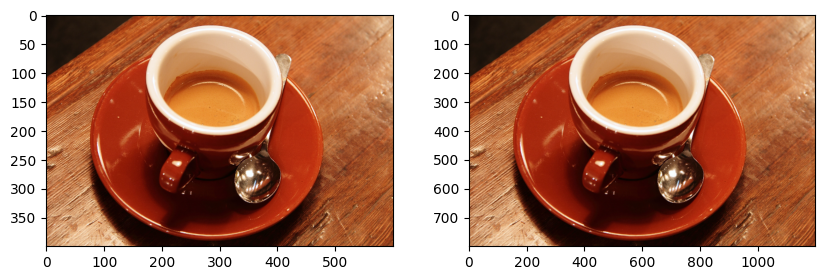

In [14]:
# Scaling
img = cv2.imread('imgs/coffee.png')
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

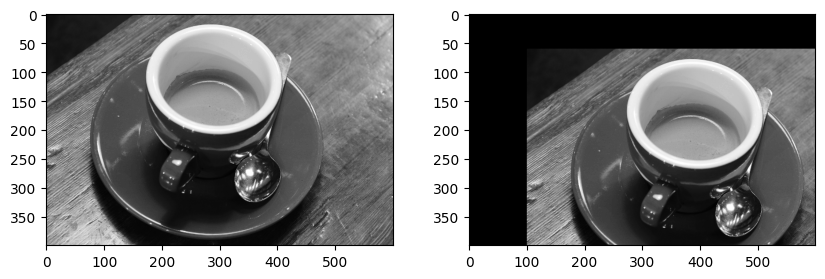

In [15]:
# Translation
img = cv2.imread('imgs/coffee.png', cv2.IMREAD_GRAYSCALE)
rows,cols = img.shape

M = np.float32([[1,0,100],[0,1,60]])
dst = cv2.warpAffine(img,M,(cols,rows))

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(dst, cmap='gray')

[[ 6.123234e-17  1.000000e+00  1.000000e+02]
 [-1.000000e+00  6.123234e-17  5.000000e+02]]


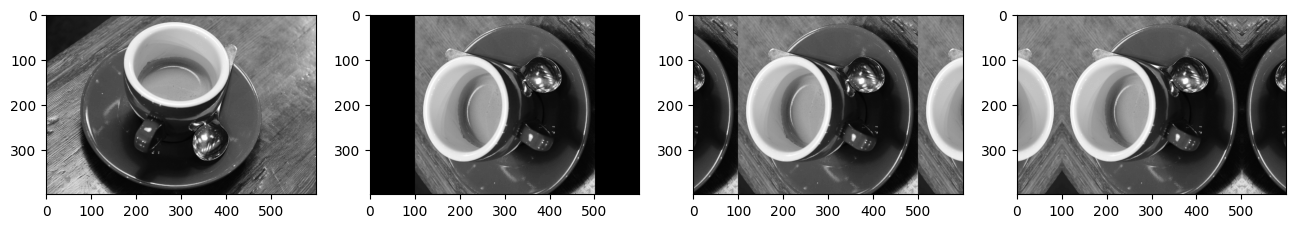

In [16]:
# Rotation
img = cv2.imread('imgs/coffee.png', cv2.IMREAD_GRAYSCALE)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
print(M)
dst1 = cv2.warpAffine(img,M,(cols,rows))
dst2 = cv2.warpAffine(img,M,(cols,rows),borderMode=cv2.BORDER_WRAP)
dst3 = cv2.warpAffine(img,M,(cols,rows),borderMode=cv2.BORDER_REFLECT)

plt.figure(figsize=(16,3))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(dst1, cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(dst2, cmap='gray')
plt.subplot(1, 4, 4)
plt.imshow(dst3, cmap='gray')

[[-7.91113071e-02 -1.02040816e-01  4.65000000e+02]
 [ 4.74116544e-02  0.00000000e+00  2.20000000e+02]
 [-1.65389492e-04  0.00000000e+00  1.00000000e+00]]


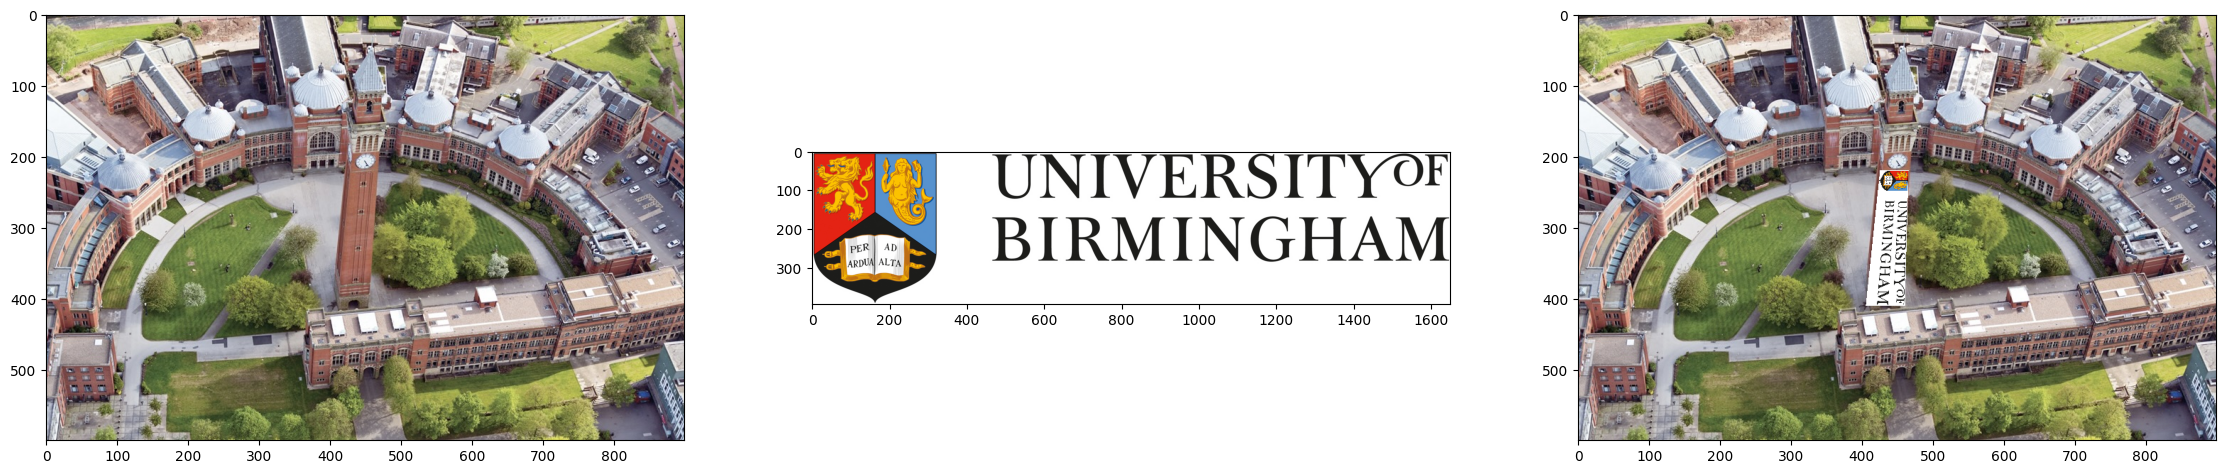

In [17]:
# Homography(Perspective Transformation)
img1 = cv2.imread('imgs/old-joe-campus-aerial.jpeg')
img2 = cv2.imread('imgs/logo.jpg')
rows1,cols1,ch1 = img1.shape
rows2,cols2,ch2 = img2.shape

pts1 = np.float32([(0,0),(cols2-1,0),(cols2-1,rows2-1),(0,rows2-1)])
pts2 = np.float32([(465,220),(460,410),(405,410),(425,220)])

M = cv2.getPerspectiveTransform(pts1,pts2)
print(M)
img3 = np.copy(img1)
cv2.warpPerspective(img2,M,(cols1,rows1),img3,borderMode=cv2.BORDER_TRANSPARENT)

plt.figure(figsize=(28,6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

## SIFT Matching

80 matches


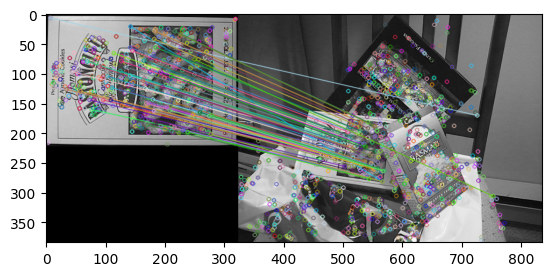

In [18]:
# Open and show images
img1 = cv2.imread('imgs/box.png')
img2 = cv2.imread('imgs/box_in_scene.png')

# SIFT feature extracting
sift = cv2.SIFT_create()
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# BFMatcher(Brute Force Matcher) with defalut setting
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test as in David Rowe's paper
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)
print('%d matches' % len(good_matches))

img3 = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

---

### Reference

 - [Basic Operations on Images — OpenCV documentation](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_core/py_basic_ops/py_basic_ops.html)
 - https://github.com/dalgu90/opencv-tutorial
 - [Image Gradients — OpenCV documentation](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_gradients/py_gradients.html)
 - [Canny Edge Detection — OpenCV documentation](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_canny/py_canny.html)